<H1>Import libraries</H1>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import calinski_harabasz_score


<H2>generate data set for custering</H2> 

,x_axis,y_axis,set_number
0,0.720868,3.713471,0
1,-1.894684,7.968985,3
2,1.356789,4.364625,0
3,1.053744,4.492869,0
4,1.591415,4.904977,0
5,0.782607,4.152636,0
6,-1.957517,3.872915,2
7,-0.773545,7.879236,3
8,0.123135,5.279175,0
9,-1.432847,7.715770,3


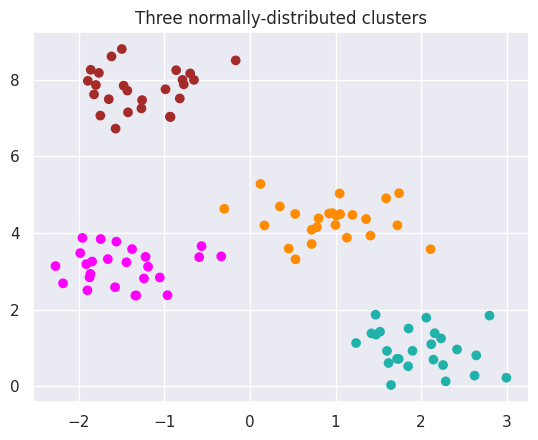

In [2]:
number_sets_to_generate = 4

X, y = make_blobs(centers=number_sets_to_generate, cluster_std=0.5, random_state=0)
generated_2_sets = pd.DataFrame({'x_axis': X[:, 0], 'y_axis': X[:, 1],'set_number':y})
display( generated_2_sets.head( 10 ) )
cmap4 = colors.ListedColormap(["darkorange", "gold", "lawngreen", "lightseagreen", "red", "blue","magenta", "black", "pink", "brown"])
plt.scatter(generated_2_sets['x_axis'], generated_2_sets['y_axis'], c=generated_2_sets['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()



<H2>split on train and test set</H2>

In [3]:
X_train, X_test, y_train, y_test = train_test_split(generated_2_sets[['x_axis','y_axis']], generated_2_sets[['set_number']], test_size=0.33, random_state=0)

<H2>run kmeans algorithm</H2>

In [4]:
kmeans = KMeans(n_clusters = number_sets_to_generate, random_state = 0, n_init='auto')
kmeans.fit(X_train)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


<H2>Plot the results</H2>

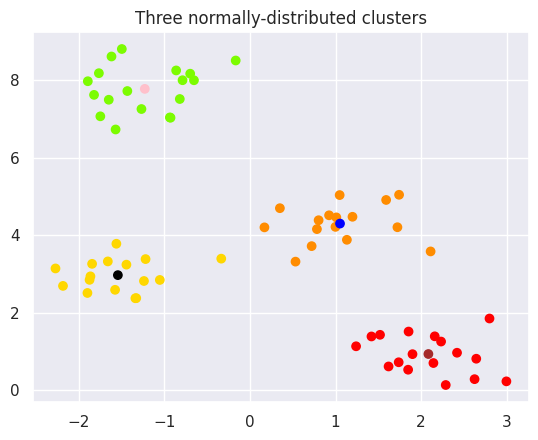

In [5]:
clusters_num = range(number_sets_to_generate,2*number_sets_to_generate,1)

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans.cluster_centers_[:, 0], 'y_axis': kmeans.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()

<H2>For 3 clusters</H2>

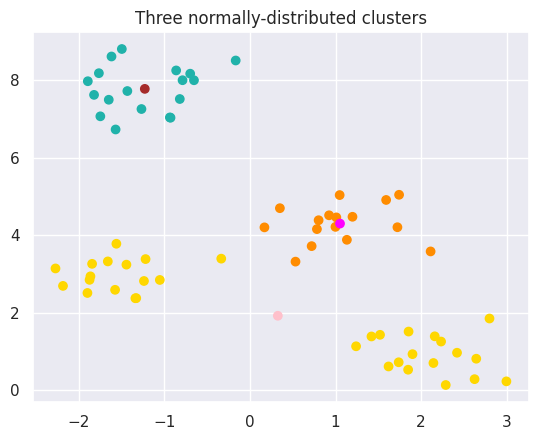

In [6]:
number_clusters = 3
kmeans_3 = KMeans(n_clusters = number_clusters, random_state = 0, n_init='auto')
kmeans_3.fit(X_train)

clusters_num = range(number_sets_to_generate,number_sets_to_generate+number_clusters,1)

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans_3.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans_3.cluster_centers_[:, 0], 'y_axis': kmeans_3.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()


<H2>For 5 clusters</H2>

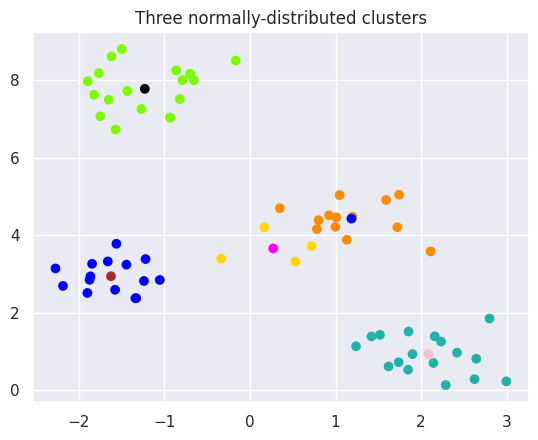

In [7]:
number_clusters = 5
kmeans_5 = KMeans(n_clusters = number_clusters, random_state = 0, n_init='auto')
kmeans_5.fit(X_train)

clusters_num = range(number_sets_to_generate,number_sets_to_generate+number_clusters,1)

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans_5.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans_5.cluster_centers_[:, 0], 'y_axis': kmeans_5.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()

<H2>For 6 clusters</H2>

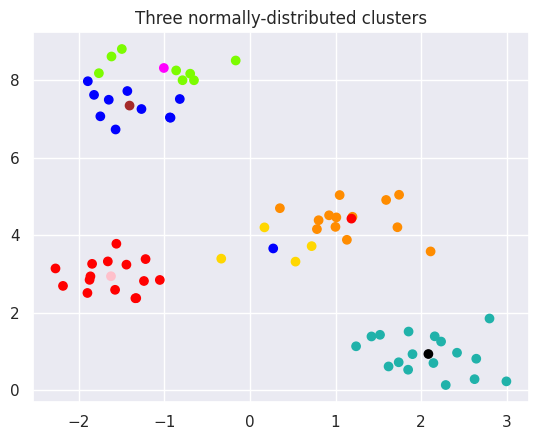

In [8]:
number_clusters = 6
kmeans_6 = KMeans(n_clusters = number_clusters, random_state = 0, n_init='auto')
kmeans_6.fit(X_train)

clusters_num = range(number_sets_to_generate,number_sets_to_generate+number_clusters,1)

clusters = pd.DataFrame({'x_axis':X_train['x_axis'],'y_axis':X_train['y_axis'],'set_number':kmeans_6.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans_6.cluster_centers_[:, 0], 'y_axis': kmeans_6.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()

<H2>How to get proper number of clusters?</H2>

<H2>Calinski Harabasz score</H2>

,clusters_number,calinski_metrix
0,3,82.007079
1,4,384.366654
2,5,320.449922
3,6,306.529545


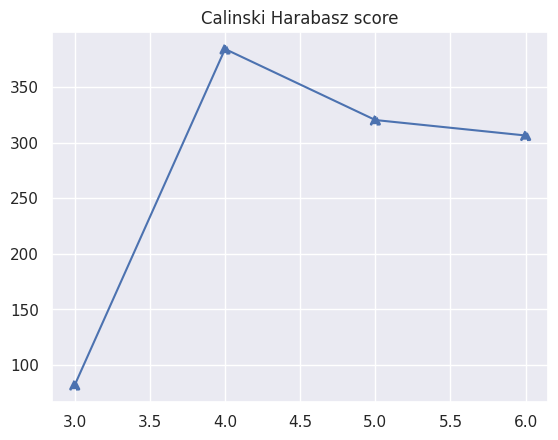

In [17]:
ch_index = calinski_harabasz_score(X_train, kmeans.labels_)
ch_index_3 = calinski_harabasz_score(X_train, kmeans_3.labels_)
ch_index_5 = calinski_harabasz_score(X_train, kmeans_5.labels_)
ch_index_6 = calinski_harabasz_score(X_train, kmeans_6.labels_)

calinski_score = pd.DataFrame({'clusters_number':[3,4,5,6],'calinski_metrix':[ch_index_3,ch_index,ch_index_5,ch_index_6],})

display( calinski_score )

plt.scatter( calinski_score['clusters_number'], calinski_score['calinski_metrix'], marker='^', ls='--', c='b', lw=2 )
plt.plot(calinski_score['clusters_number'], calinski_score['calinski_metrix'])
plt.title("Calinski Harabasz score")
plt.show()



<H2>lt's normalize variables</H2>

In [18]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

kmeans_norm = KMeans(n_clusters = 4, random_state = 0, n_init='auto')
kmeans_norm.fit(X_train_norm)


,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


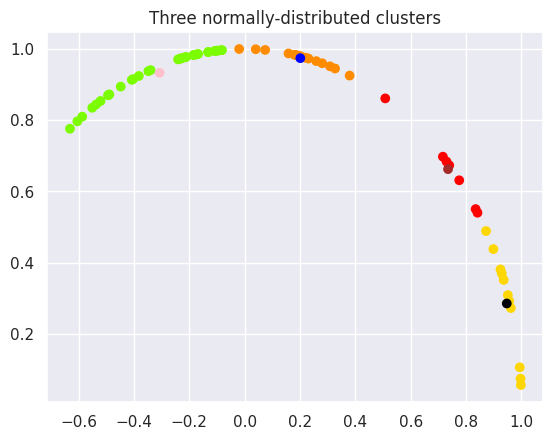

In [19]:
#clusters_num = [3,4,5]
clusters_num = [4,5,6,7]

clusters = pd.DataFrame({'x_axis':X_train_norm[:, 0],'y_axis':X_train_norm[:, 1],'set_number':kmeans_norm.labels_})
center_sets = pd.DataFrame({'x_axis': kmeans_norm.cluster_centers_[:, 0], 'y_axis': kmeans_norm.cluster_centers_[:, 1],'set_number':clusters_num})

df_res = pd.concat( [clusters, center_sets] )

plt.scatter( df_res['x_axis'], df_res['y_axis'], c=df_res['set_number'],cmap=cmap4)
plt.title("Three normally-distributed clusters")
plt.show()





In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

In [34]:
iris = load_iris()
X = iris.data[:, :4]

,clusters_number,calinski_metrix
0,2,513.924546
1,3,561.593732
2,4,529.196659
3,5,495.541488
4,6,426.118475


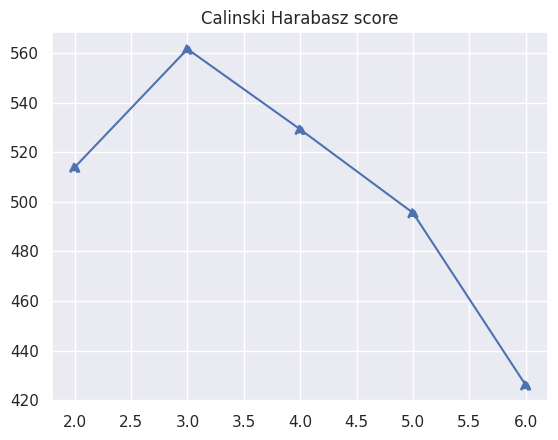

In [35]:
number_clusters = 2
kmeans_ir_2 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_2.fit_predict(X)
ch_index_ir_2 = calinski_harabasz_score(X, kmeans_ir_2.labels_)

number_clusters = 3
kmeans_ir_3 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_3.fit_predict(X)
ch_index_ir_3 = calinski_harabasz_score(X, kmeans_ir_3.labels_)

number_clusters = 4
kmeans_ir_4 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_4.fit_predict(X)
ch_index_ir_4 = calinski_harabasz_score(X, kmeans_ir_4.labels_)

number_clusters = 5
kmeans_ir_5 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_5.fit_predict(X)
ch_index_ir_5 = calinski_harabasz_score(X, kmeans_ir_5.labels_)

number_clusters = 6
kmeans_ir_6 = KMeans(n_clusters=number_clusters, random_state=30)
kmeans_ir_6.fit_predict(X)
ch_index_ir_6 = calinski_harabasz_score(X, kmeans_ir_6.labels_)

calinski_score_ir = pd.DataFrame({'clusters_number':[2,3,4,5,6],'calinski_metrix':[ch_index_ir_2,ch_index_ir_3,ch_index_ir_4,ch_index_ir_5,ch_index_ir_6]})

display( calinski_score_ir )

plt.scatter( calinski_score_ir['clusters_number'], calinski_score_ir['calinski_metrix'], marker='^', ls='--', c='b', lw=2 )
plt.plot(calinski_score_ir['clusters_number'], calinski_score_ir['calinski_metrix'])
plt.title("Calinski Harabasz score")
plt.show()



In [44]:
df_iris = pd.DataFrame({'sepal_length': X[:, 0], 'sepal_width': X[:, 1], 'petal_length': X[:, 2],'etal_width': X[:, 3], 'cluster_label':kmeans_ir_3.labels_, 'target':iris.target})

display( df_iris )

grouped = df_iris.groupby(['cluster_label', 'target']).agg({ 'sepal_length': 'count', })

grouped

,sepal_length,sepal_width,petal_length,etal_width,cluster_label,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,0,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


sepal_length
cluster_label target              
0             1                 47
              2                 14
1             0                 50
2             1                  3
              2                 36

In [45]:
#iris